In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("credit_risk_dataset.csv")

In [5]:
df.head(10)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
6,26,77100,RENT,8.0,EDUCATION,B,35000,12.42,1,0.45,N,3
7,24,78956,RENT,5.0,MEDICAL,B,35000,11.11,1,0.44,N,4
8,24,83000,RENT,8.0,PERSONAL,A,35000,8.90,1,0.42,N,2
9,21,10000,OWN,6.0,VENTURE,D,1600,14.74,1,0.16,N,3


In [6]:
df.shape

(32581, 12)

In [7]:
df.rename(columns = {'loan_int_rate':'loan_interest_rate','cb_person_default_on_file':'historical_default','cb_person_cred_hist_length':'credit_history_length'}, inplace = True)

In [8]:
df.head(10)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_interest_rate,loan_status,loan_percent_income,historical_default,credit_history_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
6,26,77100,RENT,8.0,EDUCATION,B,35000,12.42,1,0.45,N,3
7,24,78956,RENT,5.0,MEDICAL,B,35000,11.11,1,0.44,N,4
8,24,83000,RENT,8.0,PERSONAL,A,35000,8.90,1,0.42,N,2
9,21,10000,OWN,6.0,VENTURE,D,1600,14.74,1,0.16,N,3


### Check Data Types

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   person_age             32581 non-null  int64  
 1   person_income          32581 non-null  int64  
 2   person_home_ownership  32581 non-null  object 
 3   person_emp_length      31686 non-null  float64
 4   loan_intent            32581 non-null  object 
 5   loan_grade             32581 non-null  object 
 6   loan_amnt              32581 non-null  int64  
 7   loan_interest_rate     29465 non-null  float64
 8   loan_status            32581 non-null  int64  
 9   loan_percent_income    32581 non-null  float64
 10  historical_default     32581 non-null  object 
 11  credit_history_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [10]:
df.nunique()

person_age                 58
person_income            4295
person_home_ownership       4
person_emp_length          36
loan_intent                 6
loan_grade                  7
loan_amnt                 753
loan_interest_rate        348
loan_status                 2
loan_percent_income        77
historical_default          2
credit_history_length      29
dtype: int64

In [11]:
for col in ['person_home_ownership', 'loan_intent', 'loan_grade', 'loan_status', 'historical_default']:
    print('\n',df[col].value_counts())


 person_home_ownership
RENT        16446
MORTGAGE    13444
OWN          2584
OTHER         107
Name: count, dtype: int64

 loan_intent
EDUCATION            6453
MEDICAL              6071
VENTURE              5719
PERSONAL             5521
DEBTCONSOLIDATION    5212
HOMEIMPROVEMENT      3605
Name: count, dtype: int64

 loan_grade
A    10777
B    10451
C     6458
D     3626
E      964
F      241
G       64
Name: count, dtype: int64

 loan_status
0    25473
1     7108
Name: count, dtype: int64

 historical_default
N    26836
Y     5745
Name: count, dtype: int64


### Check Null Values

In [12]:
df.isnull().mean()/100

person_age               0.000000
person_income            0.000000
person_home_ownership    0.000000
person_emp_length        0.000275
loan_intent              0.000000
loan_grade               0.000000
loan_amnt                0.000000
loan_interest_rate       0.000956
loan_status              0.000000
loan_percent_income      0.000000
historical_default       0.000000
credit_history_length    0.000000
dtype: float64

In [13]:
df['person_emp_length'] = df['person_emp_length'].fillna(df['person_emp_length'].median())

In [14]:
df.isnull().mean()/100

person_age               0.000000
person_income            0.000000
person_home_ownership    0.000000
person_emp_length        0.000000
loan_intent              0.000000
loan_grade               0.000000
loan_amnt                0.000000
loan_interest_rate       0.000956
loan_status              0.000000
loan_percent_income      0.000000
historical_default       0.000000
credit_history_length    0.000000
dtype: float64

In [15]:
df.dropna(subset=['loan_interest_rate'], inplace=True)

In [16]:
df.isnull().mean()/100

person_age               0.0
person_income            0.0
person_home_ownership    0.0
person_emp_length        0.0
loan_intent              0.0
loan_grade               0.0
loan_amnt                0.0
loan_interest_rate       0.0
loan_status              0.0
loan_percent_income      0.0
historical_default       0.0
credit_history_length    0.0
dtype: float64

In [17]:
df.duplicated().sum()

144

In [18]:
df[df.duplicated()]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_interest_rate,loan_status,loan_percent_income,historical_default,credit_history_length
15975,23,42000,RENT,5.0,VENTURE,B,6000,9.99,0,0.14,N,4
15989,23,90000,MORTGAGE,7.0,EDUCATION,B,8000,10.36,0,0.09,N,3
15995,24,48000,MORTGAGE,4.0,MEDICAL,A,4000,5.42,0,0.08,N,4
16025,24,10000,RENT,8.0,PERSONAL,A,3000,7.90,1,0.30,N,3
16028,23,100000,MORTGAGE,7.0,EDUCATION,A,15000,7.88,0,0.15,N,4
...,...,...,...,...,...,...,...,...,...,...,...,...
31947,40,38000,RENT,4.0,DEBTCONSOLIDATION,D,7000,15.99,1,0.18,N,16
32010,42,39996,MORTGAGE,2.0,HOMEIMPROVEMENT,A,2500,5.42,0,0.06,N,12
32047,36,250000,RENT,2.0,DEBTCONSOLIDATION,A,20000,7.88,0,0.08,N,17
32172,49,120000,MORTGAGE,12.0,MEDICAL,B,12000,10.99,0,0.10,N,12


In [19]:
# df.drop_duplicates(inplace=True)

# Understand the Data & Deal with Outliers

In [20]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_interest_rate,loan_status,loan_percent_income,credit_history_length
count,29465.000000,2.946500e+04,29465.000000,29465.000000,29465.000000,29465.000000,29465.000000,29465.000000
mean,27.714712,6.602047e+04,4.766537,9584.744612,11.011695,0.219379,0.170110,5.788257
std,6.300193,6.190142e+04,4.097976,6316.272282,3.240459,0.413833,0.106879,4.031987
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.910000e+04,7.000000,12250.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


### Person Age Outliers

In [21]:
df[df['person_age']>90].value_counts()

person_age  person_income  person_home_ownership  person_emp_length  loan_intent  loan_grade  loan_amnt  loan_interest_rate  loan_status  loan_percent_income  historical_default  credit_history_length
123         80004          RENT                   2.0                EDUCATION    B           20400      10.25               0            0.25                 N                   3                        1
144         200000         MORTGAGE               4.0                EDUCATION    B           6000       11.86               0            0.03                 N                   2                        1
            250000         RENT                   4.0                VENTURE      C           4800       13.57               0            0.02                 N                   3                        1
            6000000        MORTGAGE               12.0               PERSONAL     C           5000       12.73               0            0.00                 N                   25

In [22]:
df['person_age'].value_counts().head(10)

person_age
23    3518
22    3265
24    3214
25    2783
26    2256
27    1925
28    1672
29    1531
30    1174
21    1111
Name: count, dtype: int64

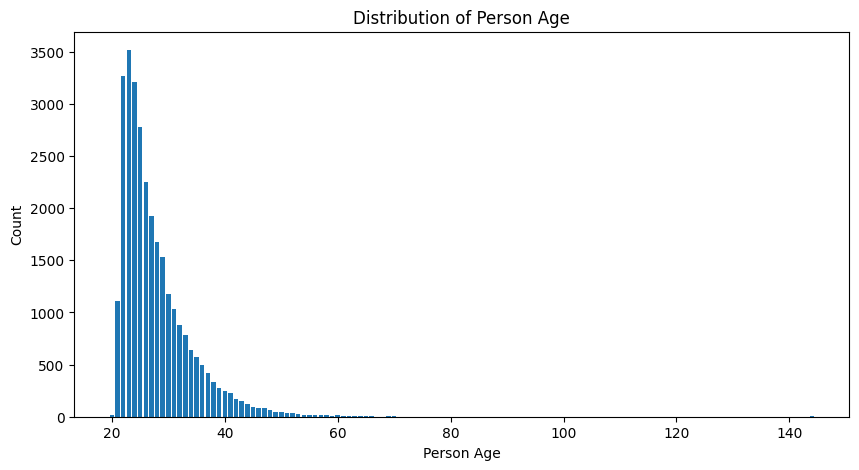

In [23]:
fig = plt.figure(figsize = (10, 5))
x = df['person_age'].value_counts().index
y = df['person_age'].value_counts().values
plt.bar(x, y)
plt.xlabel('Person Age')
plt.ylabel('Count')
plt.title('Distribution of Person Age')
plt.show()

In [24]:
df.drop(df[df['person_age'] > 90].index, axis=0,inplace = True)

### Person Employee length Outliers

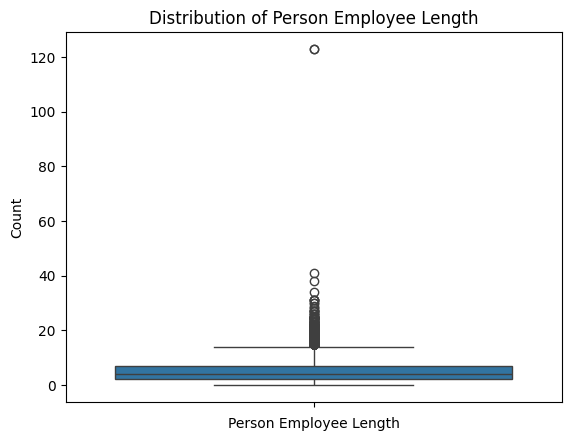

In [25]:
sns.boxplot(df['person_emp_length'])
plt.xlabel('Person Employee Length')
plt.ylabel('Count')
plt.title('Distribution of Person Employee Length')
plt.show()

In [26]:
df[df['person_emp_length'] > 41].value_counts()

person_age  person_income  person_home_ownership  person_emp_length  loan_intent  loan_grade  loan_amnt  loan_interest_rate  loan_status  loan_percent_income  historical_default  credit_history_length
21          192000         MORTGAGE               123.0              VENTURE      A           20000      6.54                0            0.10                 N                   4                        1
22          59000          RENT                   123.0              PERSONAL     D           35000      16.02               1            0.59                 Y                   3                        1
Name: count, dtype: int64

In [41]:
# median = df['person_emp_length'].median()
df.loc[df['person_emp_length']>41,'person_emp_length'] = np.NaN

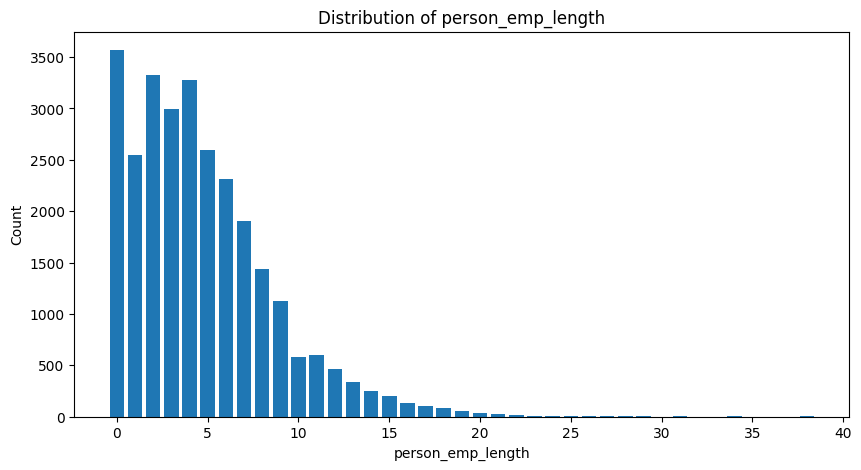

In [44]:
fig = plt.figure(figsize = (10, 5))
x = df['person_emp_length'].value_counts().index
y = df['person_emp_length'].value_counts().values
plt.bar(x, y)
plt.xlabel('person_emp_length')
plt.ylabel('Count')
plt.title('Distribution of person_emp_length')
plt.show()

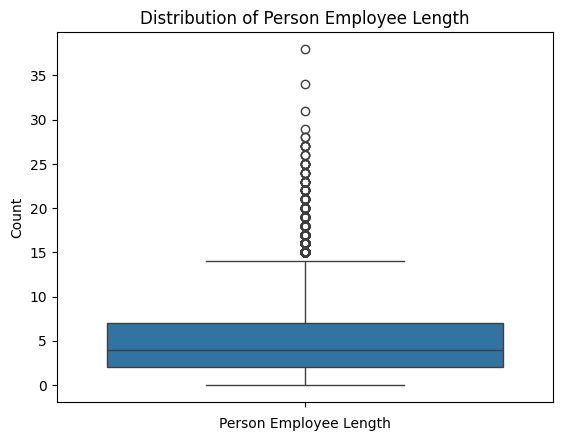

In [42]:
sns.boxplot(df['person_emp_length'])
plt.xlabel('Person Employee Length')
plt.ylabel('Count')
plt.title('Distribution of Person Employee Length')
plt.show()

### Person Income outliers

Text(0, 0.5, 'Count')

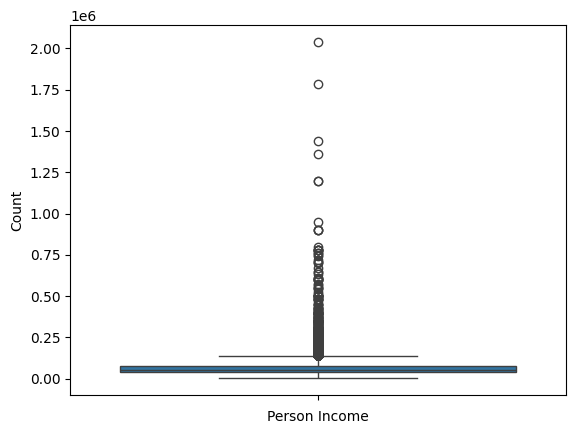

In [29]:
sns.boxplot(df['person_income'])
plt.xlabel('Person Income')
plt.ylabel('Count')

In [30]:
# Calculate Q1, Q3, and IQR
Q1 = df['person_income'].quantile(0.25)
Q3 = df['person_income'].quantile(0.75)
IQR = Q3 - Q1

# Calculate lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['person_income'] < lower_bound) | (df['person_income'] > upper_bound)]

print("Outliers:\n",outliers[['person_age','person_income']])

Outliers:
        person_age  person_income
15             23         500000
20             25         162500
33             25         306000
34             26         300000
42             26         300000
...           ...            ...
32543          52         720000
32544          58         780000
32551          58         780000
32562          61         160000
32579          56         150000

[1454 rows x 2 columns]


In [31]:
df.drop(index=outliers.index, inplace=True)

Text(0, 0.5, 'Count')

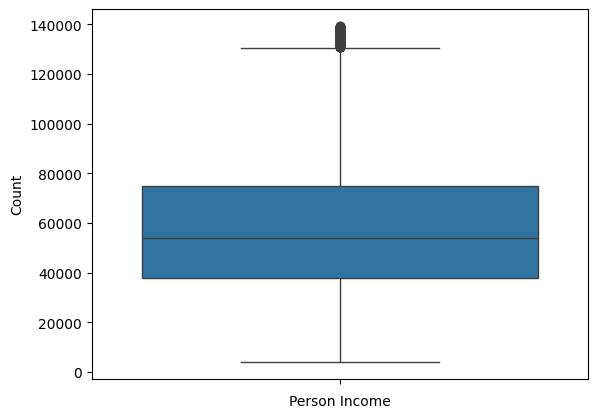

In [32]:
sns.boxplot(df['person_income'])
plt.xlabel('Person Income')
plt.ylabel('Count')

### Credit History length Outliers

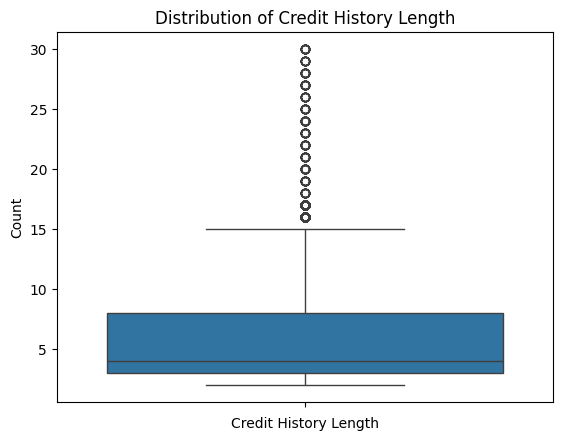

In [33]:
sns.boxplot(df['credit_history_length'])
plt.xlabel('Credit History Length')
plt.ylabel('Count')
plt.title('Distribution of Credit History Length')
plt.show()

In [34]:
# Calculate Q1, Q3, and IQR
Q1 = df['credit_history_length'].quantile(0.25)
Q3 = df['credit_history_length'].quantile(0.75)
IQR = Q3 - Q1

# Calculate lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['credit_history_length'] < lower_bound) | (df['credit_history_length'] > upper_bound)]

print("Outliers:",outliers['credit_history_length'])

Outliers: 29125    17
29130    17
29134    17
29141    17
29179    16
         ..
32575    20
32576    30
32577    19
32578    28
32580    30
Name: credit_history_length, Length: 915, dtype: int64


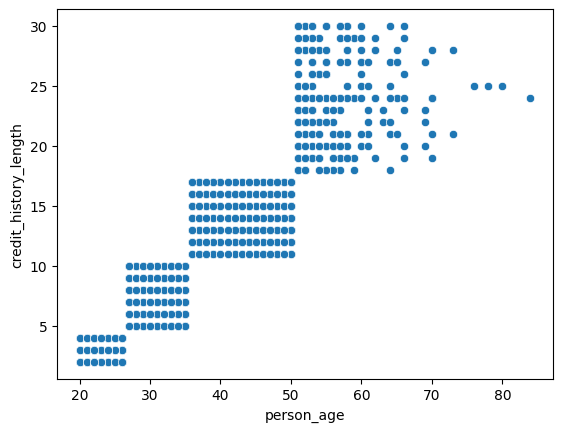

In [35]:
sns.scatterplot(x=df['person_age'],y=df['credit_history_length'])
plt.show()

### Outliers have meaning in data So I won't Remove it

# EDA

## Univariant Analysis

In [36]:
df.sample(10)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_interest_rate,loan_status,loan_percent_income,historical_default,credit_history_length
649,23,58800,RENT,7.0,DEBTCONSOLIDATION,A,20000,7.66,1,0.34,N,3
1015,23,63000,RENT,2.0,EDUCATION,C,18000,13.57,0,0.29,Y,3
9,21,10000,OWN,6.0,VENTURE,D,1600,14.74,1,0.16,N,3
7239,22,52000,MORTGAGE,6.0,EDUCATION,C,9750,13.06,0,0.19,N,3
25341,30,25716,RENT,1.0,PERSONAL,C,3000,13.72,0,0.12,N,10
3406,22,36000,MORTGAGE,2.0,DEBTCONSOLIDATION,A,10000,8.32,0,0.28,N,3
24346,27,48000,RENT,0.0,MEDICAL,B,10000,10.62,0,0.21,N,6
13422,21,27000,RENT,3.0,PERSONAL,C,2600,13.22,0,0.10,Y,2
28931,27,62900,RENT,7.0,MEDICAL,D,24250,15.31,1,0.33,N,6
8258,24,40000,RENT,1.0,PERSONAL,A,7500,5.79,0,0.19,N,4


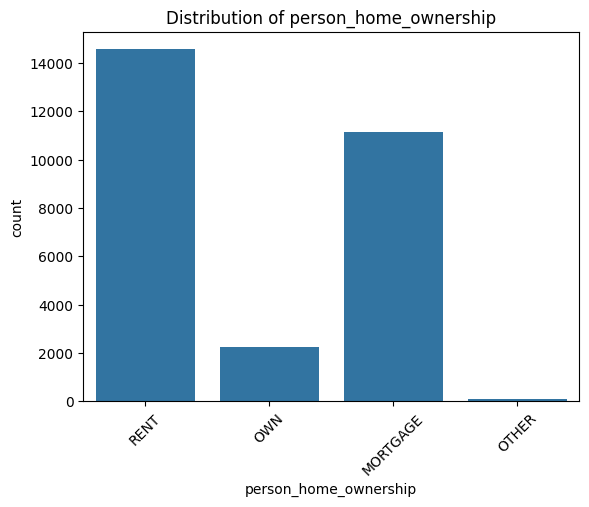

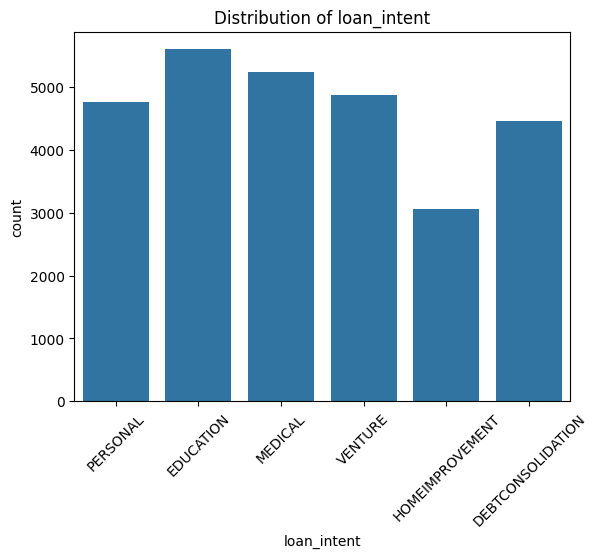

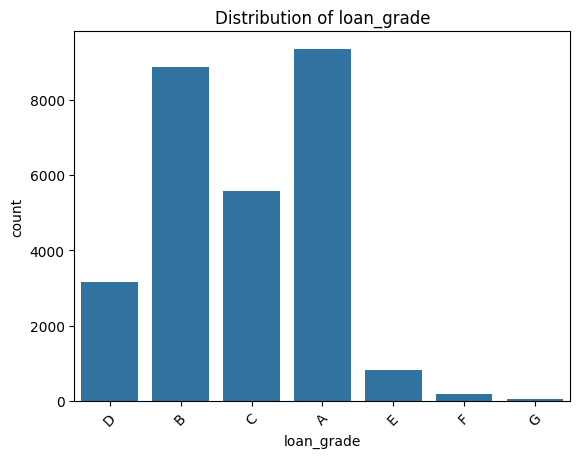

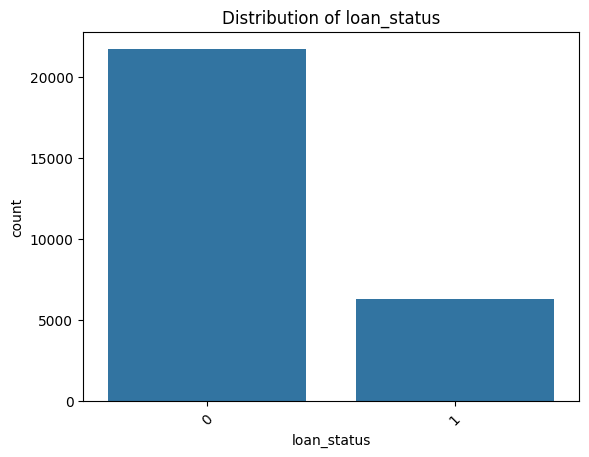

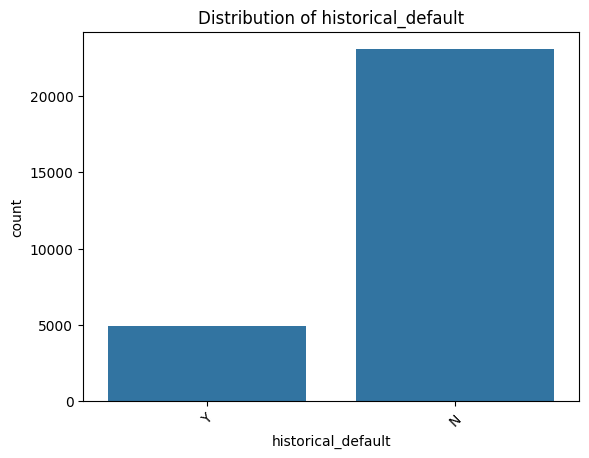

In [37]:
for col in ['person_home_ownership', 'loan_intent', 'loan_grade', 'loan_status', 'historical_default']:
    sns.countplot(x=df[col])
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()


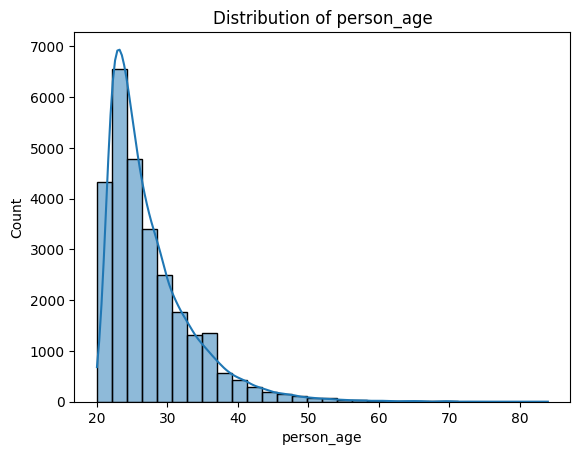

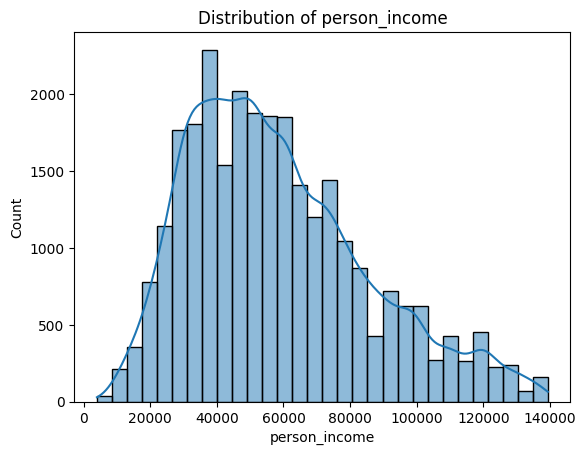

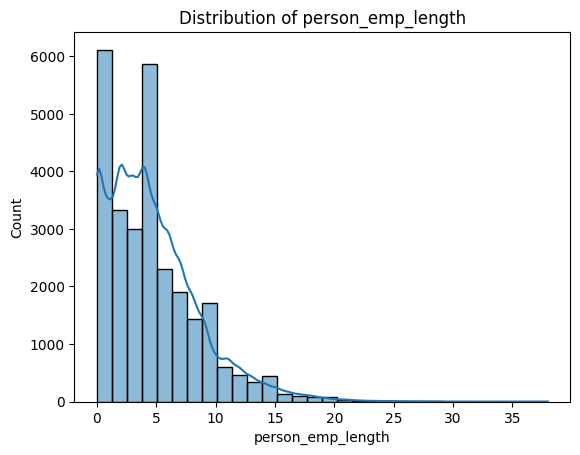

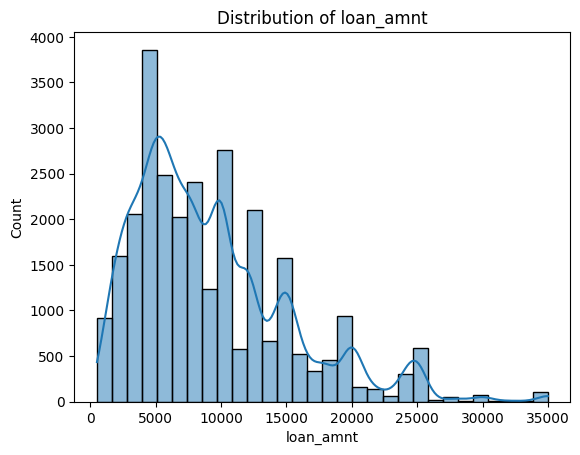

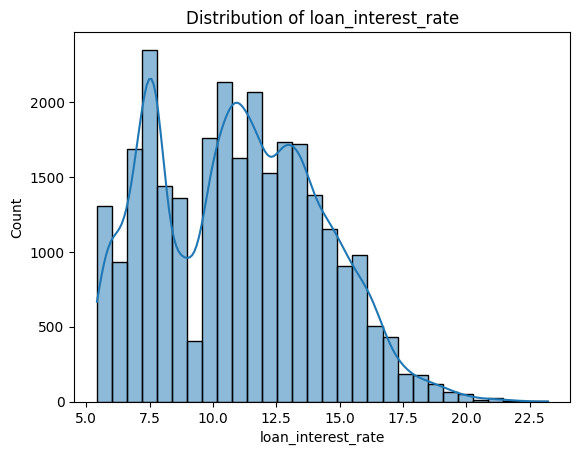

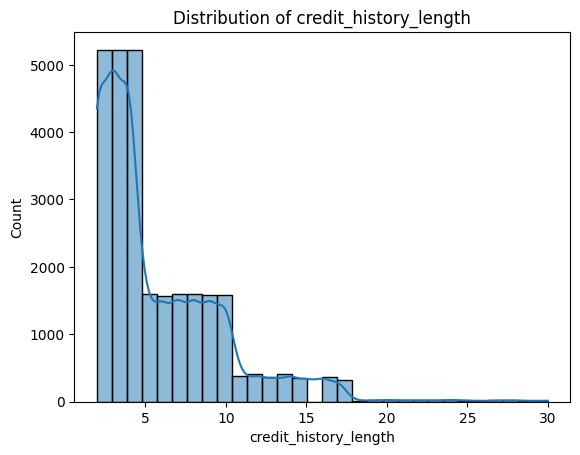

In [38]:
for col in ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_interest_rate', 'credit_history_length']:
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()


### Bivariate Analysis

In [39]:
numeric_cols = df.select_dtypes(include=np.number)

Text(0.5, 1.0, 'Confusion Matrix')

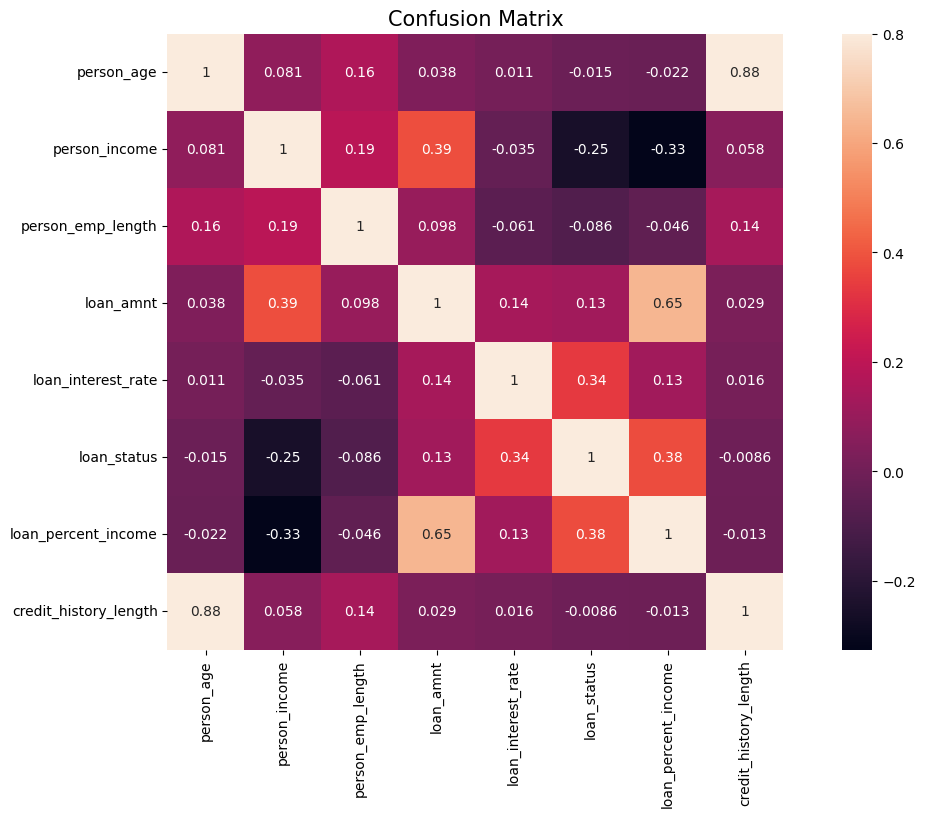

In [47]:
fig, ax = plt.subplots()
fig.set_size_inches(15,8)
sns.heatmap(numeric_cols.corr(), vmax =.8, square = True, annot = True )
plt.title('Confusion Matrix',fontsize=15)

In [49]:
df.to_csv('clean_credit_risk.csv',sep=',',index=False, header=True, encoding=None)